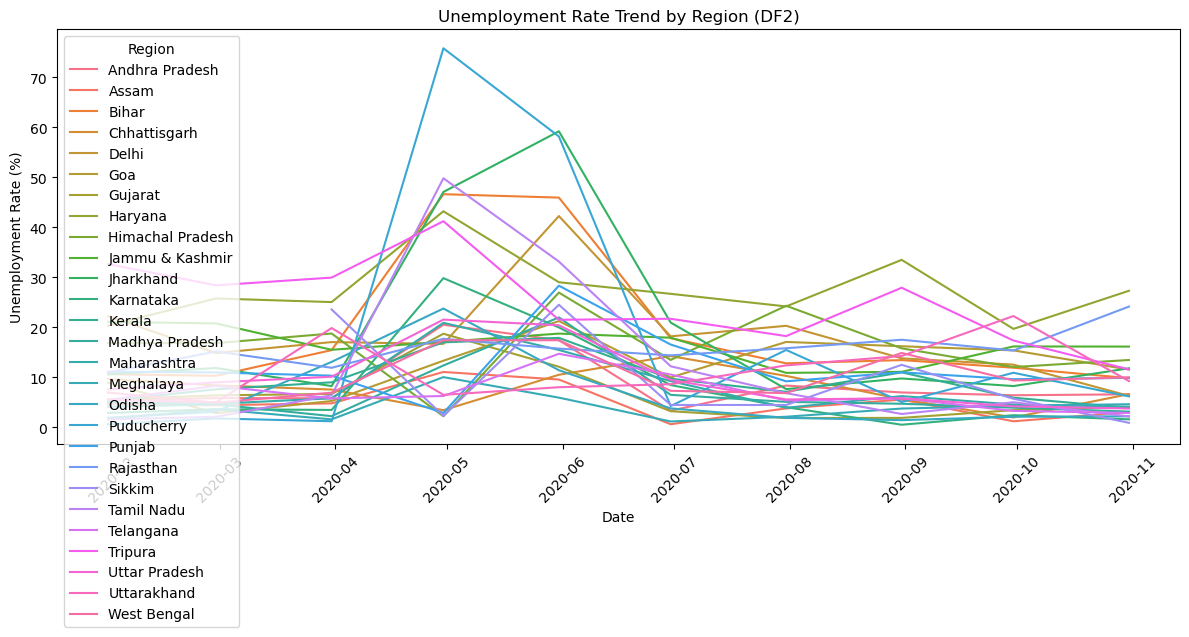

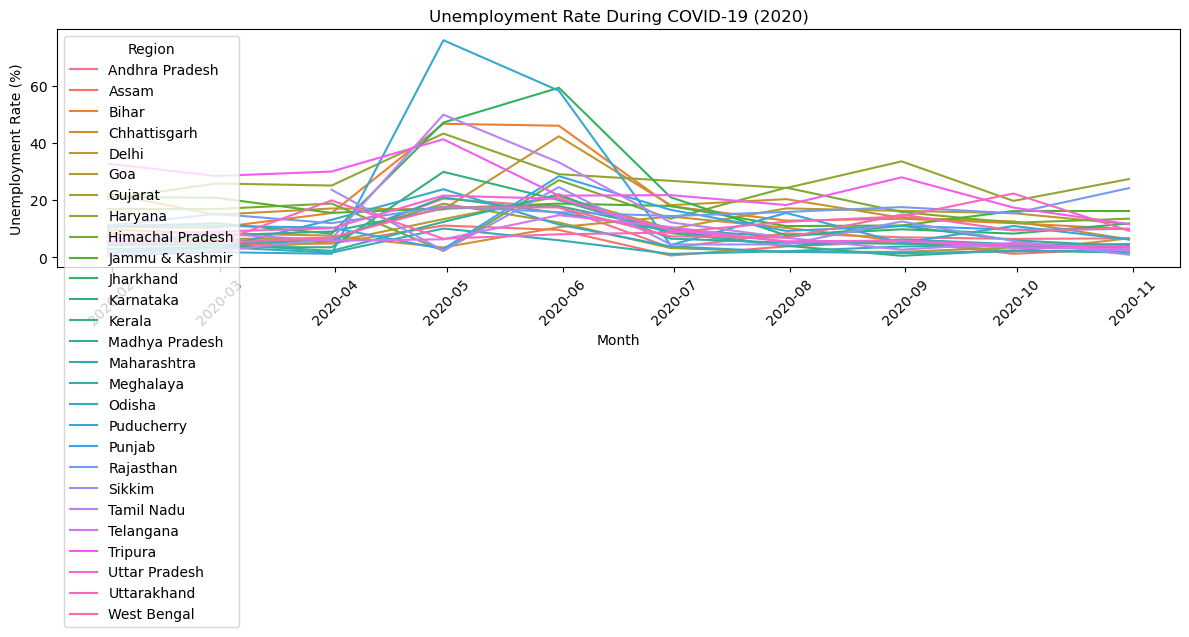

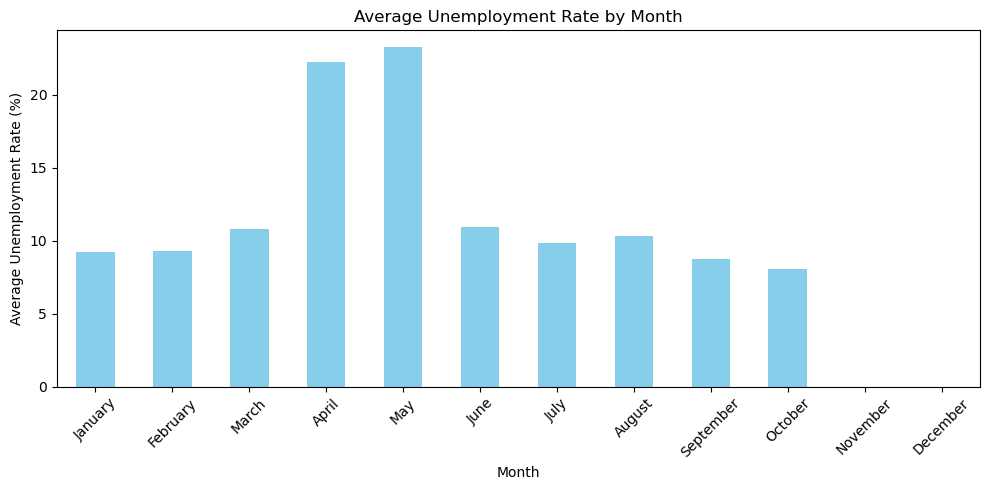


🔍 Top 10 Highest Unemployment Spikes During COVID:

         Region       Date  Estimated Unemployment Rate (%)
172  Puducherry 2020-04-30                            75.85
103   Jharkhand 2020-05-31                            59.23
173  Puducherry 2020-05-31                            58.19
210  Tamil Nadu 2020-04-30                            49.83
102   Jharkhand 2020-04-30                            47.09
23        Bihar 2020-04-30                            46.64
24        Bihar 2020-05-31                            45.96
73      Haryana 2020-04-30                            43.22
44        Delhi 2020-05-31                            42.27
230     Tripura 2020-04-30                            41.23


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df1 = pd.read_csv("Unemployment in India.csv")
df2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

# Strip whitespace from column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Convert 'Date' column to datetime (day-first format)
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True, errors='coerce')

# Drop rows with invalid or missing values
df1.dropna(inplace=True)
df2.dropna(inplace=True)

# ----------- TREND VISUALIZATION (DF2) -------------
plt.figure(figsize=(12, 6))
sns.lineplot(data=df2, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title("Unemployment Rate Trend by Region (DF2)")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------- COVID-19 FOCUS ANALYSIS (2020) -------------
covid_df = df2[df2['Date'].dt.year == 2020]

plt.figure(figsize=(12, 5))
sns.lineplot(data=covid_df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title("Unemployment Rate During COVID-19 (2020)")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------- SEASONAL TREND ANALYSIS -------------
df2['Month'] = df2['Date'].dt.month_name()
monthly_avg = df2.groupby('Month')['Estimated Unemployment Rate (%)'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title("Average Unemployment Rate by Month")
plt.ylabel("Average Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------- TOP 10 SPIKES DURING COVID -------------
high_unemp = covid_df.sort_values(by='Estimated Unemployment Rate (%)', ascending=False).head(10)

print("\n🔍 Top 10 Highest Unemployment Spikes During COVID:\n")
print(high_unemp[['Region', 'Date', 'Estimated Unemployment Rate (%)']])
